In [62]:
import sys
import warnings                                 # `dnd` mode
warnings.filterwarnings('ignore')

In [63]:
# Import necessary libraries

from simple_colors import *                     # print text formatting 
from pprint import pprint                       # import petty print
import numpy as np                              # Import Numpy library for vectors, matrix, algebra
import pandas as pd                             # Import Pandas library for dataframe preparation and manipulation
import statistics                               # Import Statistics library for basic statistics, if required
import statsmodels.api as sm                    # Statsmodel is an essential module to conduct statistical tests
from scipy import stats                         # Scipy builds on Numpy for mathematical computation
from scipy.stats import zscore                  # Import Zscore function from Scipy Stats module
from scipy.stats import variation               # Compute coefficient of variation

import matplotlib.pyplot as plt                 # Import Pyplot from matplotlib
import seaborn as sns                           # Import Seaborn library for data visualization
sns.set(color_codes = True)                     # data visualization

from sklearn.preprocessing import LabelEncoder   # Import library to encode categorical data
from sklearn.preprocessing import StandardScaler # Standard Scaler will be used for scaling the data
from sklearn.neighbors import LocalOutlierFactor # To detect outliers using Local Outlier Factor
from sklearn import model_selection          
from sklearn.model_selection import train_test_split # Importing train test split for splitting data from Scikit Learn
from sklearn.model_selection import GridSearchCV     # Hyperparameter tuning through looping
from sklearn.pipeline import Pipeline                # Assemble multiple steps for crossvalidation
from sklearn import metrics                          # Importing Metrics for Accuracy Testing from Scikit Learn
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix #import the accuracy classes from the library. 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [64]:
# Set display of tables

pd.set_option("display.max_column", None) # set display of all columns
pd.options.display.max_colwidth = 150     # increase column width to display large text
pd.set_option("display.max_rows", None) # set display of all rows

In [65]:
%matplotlib inline

In [66]:
df1 = pd.read_csv("/Users/kaushik/Desktop/GL_projects/hackathon/Train/frequency_domain_features_train.csv")
df2 = pd.read_csv("/Users/kaushik/Desktop/GL_projects/hackathon/Train/heart_rate_non_linear_features_train.csv")
df3 = pd.read_csv("/Users/kaushik/Desktop/GL_projects/hackathon/Train/time_domain_features_train.csv")

In [67]:
df_test1 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/frequency_domain_features_test.csv")
df_test2 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/heart_rate_non_linear_features_test.csv")
df_test3 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/time_domain_features_test.csv")

In [68]:
df = pd.merge(df1, df2, on='uuid')

In [69]:
df = pd.merge(df, df3, on='uuid')

In [70]:
df.shape

(369289, 37)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  SD1                369289 non-null  float64
 13  SD2                369289 non-null  float64
 14  sampen             369289 non-null  float64
 15  higuci             369289 non-null  float64
 16  da

In [72]:
df = df.drop(["uuid", "datasetId"], axis =1)

In [73]:
df = pd.get_dummies(df, prefix=['condition'], prefix_sep='_', dummy_na=False, columns=['condition'])

In [74]:
indep_var = df.drop(['HR'], axis = 1)

In [75]:
col = indep_var.columns.to_list()

In [76]:
# Setting up the data. 
# K is fixed by passing the n_neighbors parameter with integer. 
# I have used the default Euclidean distance.
lof = LocalOutlierFactor(n_neighbors = 15)
#Training the model taking only independent variables
df['lof'] = lof.fit_predict(df[col])
#Getting the negative LOF score
df['negative_outlier_factor'] = lof.negative_outlier_factor_

In [77]:
# Detecting the outliers
outliers = df[df['lof'] == -1]
# Finding the number of outlier records
n_outliers = outliers.shape[0]
n_records = df.shape[0]
percent_outliers = n_outliers/n_records*100
print(blue("There are", ["bold"]), round(percent_outliers, 2), 
      blue("percent outlier records in the data.", ["bold"]))

There are 1.59 percent outlier records in the data.


In [78]:
# Droping the outlier records to create a new dataframe df1
df = df.loc[df['lof'] >= 0]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363434 entries, 0 to 369288
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   VLF                      363434 non-null  float64
 1   VLF_PCT                  363434 non-null  float64
 2   LF                       363434 non-null  float64
 3   LF_PCT                   363434 non-null  float64
 4   LF_NU                    363434 non-null  float64
 5   HF                       363434 non-null  float64
 6   HF_PCT                   363434 non-null  float64
 7   HF_NU                    363434 non-null  float64
 8   TP                       363434 non-null  float64
 9   LF_HF                    363434 non-null  float64
 10  HF_LF                    363434 non-null  float64
 11  SD1                      363434 non-null  float64
 12  SD2                      363434 non-null  float64
 13  sampen                   363434 non-null  float64
 14  higu

In [80]:
df = df.drop(["lof", "negative_outlier_factor"], axis = 1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363434 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   VLF                      363434 non-null  float64
 1   VLF_PCT                  363434 non-null  float64
 2   LF                       363434 non-null  float64
 3   LF_PCT                   363434 non-null  float64
 4   LF_NU                    363434 non-null  float64
 5   HF                       363434 non-null  float64
 6   HF_PCT                   363434 non-null  float64
 7   HF_NU                    363434 non-null  float64
 8   TP                       363434 non-null  float64
 9   LF_HF                    363434 non-null  float64
 10  HF_LF                    363434 non-null  float64
 11  SD1                      363434 non-null  float64
 12  SD2                      363434 non-null  float64
 13  sampen                   363434 non-null  float64
 14  higu

In [82]:
# Target and feature separation in original dataframe
X = df.drop(labels= "HR" , axis = 1) 
y = df["HR"]

In [83]:
scaler = StandardScaler()                 # defining scaler
X = scaler.fit_transform(X)   # scale the training data

In [84]:
pca = PCA(n_components=35)
pca.fit(X)

PCA(n_components=35)

Text(0, 0.5, 'Cumulative explained variance')

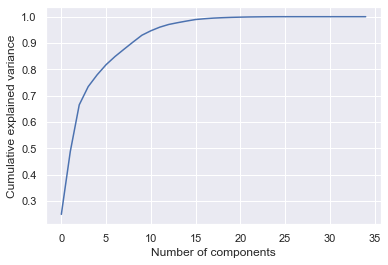

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [86]:
NCOMPONENTS = 16
pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X)

In [87]:
pca_std = np.std(X_pca_train)

In [111]:
def mlp_model():
    model = Sequential()
    model.add(Dense(36, input_dim = NCOMPONENTS, activation = "relu"))
    model.add(Dense(16, activation = "relu"))
    model.add(Dense(4, activation = "relu"))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(GaussianNoise(pca_std))
    model.compile(loss="mean_squared_error", optimizer='adam')
    return model

In [114]:
estimator = KerasRegressor(build_fn=mlp_model, epochs=30, batch_size=256, verbose=True)

In [115]:
kfold = KFold(n_splits=5, random_state=42)
results = cross_val_score(estimator, X_pca_train, y, cv=kfold)
print("Results: %.3f (%.3f) MSE" % (results.mean(), results.std()))

Epoch 1/30
1136/1136 [==============================] - 1s 517us/step - loss: 759.6949
Epoch 2/30
1136/1136 [==============================] - 1s 513us/step - loss: 8.6203
Epoch 3/30
1136/1136 [==============================] - 1s 511us/step - loss: 3.7963
Epoch 4/30
1136/1136 [==============================] - 1s 518us/step - loss: 3.1304
Epoch 5/30
1136/1136 [==============================] - 1s 517us/step - loss: 2.8708
Epoch 6/30
1136/1136 [==============================] - 1s 522us/step - loss: 2.7407
Epoch 7/30
1136/1136 [==============================] - 1s 524us/step - loss: 2.6571
Epoch 8/30
1136/1136 [==============================] - 1s 519us/step - loss: 2.6211
Epoch 9/30
1136/1136 [==============================] - 1s 527us/step - loss: 2.5852
Epoch 10/30
1136/1136 [==============================] - 1s 526us/step - loss: 2.5717
Epoch 11/30
1136/1136 [==============================] - 1s 527us/step - loss: 2.5648
Epoch 12/30
1136/1136 [==============================] - 1s 5

In [120]:
estimator.fit(X_pca_train, y)
prediction = estimator.predict(X_pca_train)

Epoch 1/30
1420/1420 [==============================] - 1s 523us/step - loss: 623.9388
Epoch 2/30
1420/1420 [==============================] - 1s 517us/step - loss: 8.8250
Epoch 3/30
1420/1420 [==============================] - 1s 518us/step - loss: 3.8978
Epoch 4/30
1420/1420 [==============================] - 1s 519us/step - loss: 2.9973
Epoch 5/30
1420/1420 [==============================] - 1s 525us/step - loss: 2.7599
Epoch 6/30
1420/1420 [==============================] - 1s 524us/step - loss: 2.6516
Epoch 7/30
1420/1420 [==============================] - 1s 526us/step - loss: 2.5951
Epoch 8/30
1420/1420 [==============================] - 1s 521us/step - loss: 2.5538
Epoch 9/30
1420/1420 [==============================] - 1s 531us/step - loss: 2.5397
Epoch 10/30
1420/1420 [==============================] - 1s 544us/step - loss: 2.5197
Epoch 11/30
1420/1420 [==============================] - 1s 539us/step - loss: 2.5050
Epoch 12/30
1420/1420 [==============================] - 1s 5

NameError: name 'accuracy_score' is not defined

In [123]:
df_test1 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/frequency_domain_features_test.csv")
df_test2 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/heart_rate_non_linear_features_test.csv")
df_test3 = pd.read_csv("/Users/kaushik/OneDrive/GL/Hackathon/Test Zip/time_domain_features_test.csv")

In [124]:
df_test = pd.merge(df_test1, df_test2, on='uuid')

In [125]:
df_test = pd.merge(df_test, df_test3, on='uuid')

In [126]:
df_test = df_test.drop(["datasetId"], axis =1)

In [127]:
_id = df_test["uuid"]

In [128]:
test = df_test.drop(["uuid"], axis = 1)

In [129]:
test = pd.get_dummies(test, prefix=['condition'], prefix_sep='_', dummy_na=False, columns=['condition'])

In [130]:
test.shape

(41033, 36)

In [131]:
X_scale = scaler.transform(test)   # scale the training data

In [132]:
X_test = pca.transform(X_scale)

In [133]:
HR = estimator.predict(X_test)

161/161 [==============================] - 0s 429us/step


In [142]:
HR = pd.DataFrame(data=HR.flatten())

In [147]:
test.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,condition_interruption,condition_no stress,condition_time pressure
0,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,190.643094,0.005245,8.347898,115.862444,2.209659,1.100715,934.665288,939.03173,82.139495,11.801781,11.801772,6.959924,3.933333,0.133333,-0.680262,-0.233075,0.000016,0.000288,0.012933,0.004578,0.004578,2.825038,-0.680262,-0.233075,0,0,1
1,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,39.147940,0.025544,14.542096,77.118903,2.186132,1.290615,817.062380,816.33879,55.492332,20.558810,20.558768,2.699200,24.600000,0.533333,-0.034454,-0.051689,0.000040,-0.002749,0.025148,0.013921,0.013921,1.806517,-0.034454,-0.051689,0,1,0
2,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,45.069921,0.022188,9.799336,125.044377,2.051571,1.226663,876.762022,894.19889,88.690820,13.853737,13.853730,6.401942,7.066667,0.533333,-0.206953,-0.589940,0.000010,-0.000172,0.015533,0.008149,0.008149,1.906180,-0.206953,-0.589940,0,1,0
3,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,83.588517,0.011963,11.639185,302.029812,2.080910,1.085143,1038.640693,998.91429,213.725850,16.457194,16.454801,12.986774,10.800000,1.866667,-0.820407,0.487198,-0.000238,-0.000464,0.016882,0.007587,0.007587,2.225116,-0.820407,0.487198,0,0,1
4,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,11.202647,0.089265,7.266567,72.579248,2.068728,1.252547,774.548508,778.90508,51.577855,10.273114,10.273049,5.020664,2.000000,0.066667,1.738453,-0.005082,0.000054,-0.000006,0.013479,0.007811,0.007811,1.725606,1.738453,-0.005082,1,0,0


In [168]:
output = pd.concat([_id, HR], axis = 1)

In [169]:
output.head()

,uuid,0
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.308411
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,73.738373
2,cb573d3a-c767-4556-b32e-ad8c08ded214,69.167885
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,61.020229
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.008064


In [170]:
output.shape

(41033, 2)

In [172]:
output.rename(columns = {'0':'HR'}, inplace = True)

In [173]:
output.head()

,uuid,0
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.308411
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,73.738373
2,cb573d3a-c767-4556-b32e-ad8c08ded214,69.167885
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,61.020229
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.008064


In [158]:
output.to_csv("/Users/kaushik/Desktop/GL_projects/hackathon/output.csv", index = False)

In [159]:
dataframe = pd.read_csv("/Users/kaushik/Desktop/GL_projects/hackathon/output.csv")